# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

In [1]:
RANDOM_SEED = 42

In [2]:
from enum import Enum

class ColorSpace(Enum):
    RGB = 1
    grayscale = 2
    
class WeightsInitialization(Enum):
    normal = 1
    xavier = 2

---
## Step 0: Load The Data

In [3]:
# Load pickled data
import pickle
import os
import numpy as np

data_dir = os.path.join('..', 'data')
training_file = os.path.join(data_dir, 'train.p')
validation_file = os.path.join(data_dir, 'valid.p')
testing_file = os.path.join(data_dir, 'test.p')

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = np.array(train['features']), np.array(train['labels'])
X_valid, y_valid = np.array(valid['features']), np.array(valid['labels'])
X_test, y_test = np.array(test['features']), np.array(test['labels'])

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [4]:
import pandas as pd

# Number of training examples
n_train = y_train.shape[0]

# Number of validation examples
n_validation = y_valid.shape[0]

# Number of testing examples.
n_test = y_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# How many unique classes/labels there are in the dataset.
train_labels_df = pd.DataFrame(y_train, columns=['class'])
n_classes = train_labels_df.nunique()[0]

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [5]:
### Data exploration visualization code
import math
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

def plot_images_as_grid(images, labels=None, images_per_row=5, figsize=(10, 6), cmap=None):
    if labels is None:
        labels = []

    rows = math.ceil(len(images) / images_per_row)
    columns = images_per_row

    fig = plt.figure(figsize=figsize)
    for i in range(0, len(images)):
        ax = fig.add_subplot(rows, columns, i + 1)
        if i < len(labels):
            ax.set_title(labels[i])
        ax.imshow(images[i], cmap=cmap)
    plt.tight_layout()
    plt.show()
    return fig

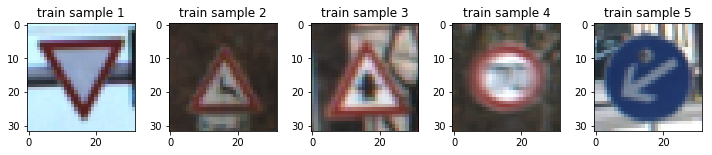

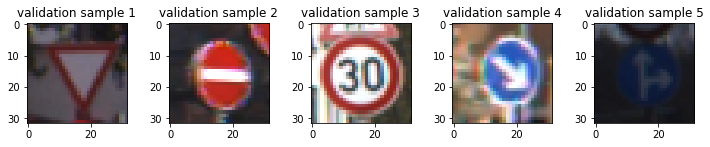

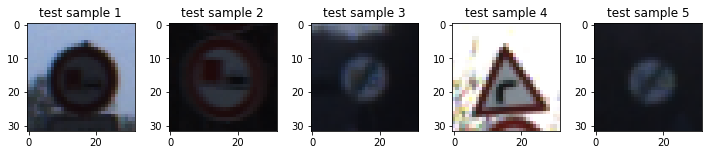

In [6]:
import random

# Select 5 random images from each of the train, validation and test datasets to check that
# the data consists of valid images.
random.seed(RANDOM_SEED)
num_samples = 5
dataset_dict = {'train': X_train, 'validation': X_valid, 'test': X_test}

for key in dataset_dict:
    dataset = dataset_dict[key]
    random_images = random.choices(dataset, k=num_samples)
    plot_images_as_grid(random_images, labels=[f'{key} sample {i+1}' for i in range(num_samples)], images_per_row=num_samples)

total number of samples=34799 which should equal n_train=34799


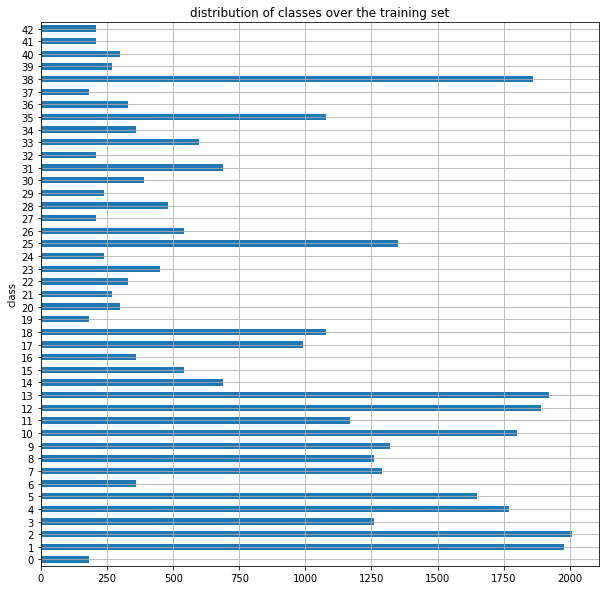

In [7]:
class_dist = train_labels_df.groupby('class').size()

# If the sum of our class distribution stats and n_train are equal, everything is fine
print(f'total number of samples={sum(class_dist)} which should equal n_train={n_train}')

class_dist.plot.barh(title='distribution of classes over the training set', figsize=(10, 10), colormap='tab10', grid=True)

This shows the distribution of the classes in the original training set. Outlined by the chart, it can be seen that the dataset is not balanced across classes. I will address this problem later to prevent the model from overfitting or having bias towards specific classes.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

Mean before normalization:  82.6775890369964
Mean after normalization:  0.015879638


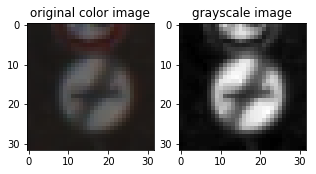

In [8]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
from sklearn.utils import shuffle
import cv2

def normalize_image(image):
    # return (image - 128) / 128
    # return (image - 255) / 255
    tmp_dst = np.zeros_like(image)
    return cv2.normalize(image, tmp_dst, dtype=cv2.CV_32F)  # better normalization with less mean and higher performance

def preprocess_data(X, y, color_space=ColorSpace.RGB, normalize=True):
    if color_space is ColorSpace.grayscale:
        X = np.array([cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) for image in X])
    
    if normalize is True:
        X = np.array([normalize_image(image) for image in X])
        
    if color_space is ColorSpace.grayscale:
        X = X[:, :, :, None]  # 2d convolutions expect third dimension for color even for grayscale images
    return X, y

print('Mean before normalization: ', np.mean(np.mean(X_train)))
X_train_norm, y_train_norm = preprocess_data(X_train, y_train)
print('Mean after normalization: ', np.mean(np.mean(X_train_norm)))

# Check that grayscale conversion works properly:
gray_img, _ = preprocess_data(X_train[:1], y_train[:1], color_space=ColorSpace.grayscale, normalize=False)

fig = plt.figure(figsize=(5, 3))
ax = fig.add_subplot(121)
ax.set_title('original color image')
ax.imshow(X_train[0])
ax = fig.add_subplot(122)
ax.set_title('grayscale image')
ax.imshow(gray_img[0, :, :, 0], cmap='gray')
plt.show()

### Data augmentation

In order to increase the size of the training set, so that I can overcome overfitting issues, I use data augmentation to create additional transformed images. I carefully chose the ranges for random values to be within a limited range to get images which are still close to realistic samples. Also, a neural net should of course nonetheless be able to derive the meaning of the signs from the augmented images.

Horizontal flip is not used as the meaning of traffic sign can depend on the direction where it shows. Not only do written numbers for speed limits look different, but a lot of signs also include arrows pointing into a specific direction.

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def augment_images(X_images, y_images, num_transforms=5):
    gen = ImageDataGenerator(
        rotation_range=15,
        zoom_range=0.1,
        width_shift_range=2, 
        height_shift_range=2)
    
    num_samples = len(X_images)
    
    num_augmentations = 0
    augmented_images = []
    labels = []
    for X_aug, y_aug in gen.flow(X_images, y_images, batch_size=32, seed=RANDOM_SEED):
        augmented_images.append(X_aug)
        labels.append(y_aug)
        num_augmentations += len(X_aug)
        if num_augmentations >= num_samples * num_transforms:
            break
    
    augmented_images = np.concatenate(augmented_images)
    return np.asarray(augmented_images, dtype=np.uint8), np.concatenate(np.array(labels))

C:\Users\bjoer\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Test data augmentation

[7296, 1639, 18024, 16049, 14628]
Augmented data shape:
X shape: (15, 32, 32, 3)
y shape: (15,)


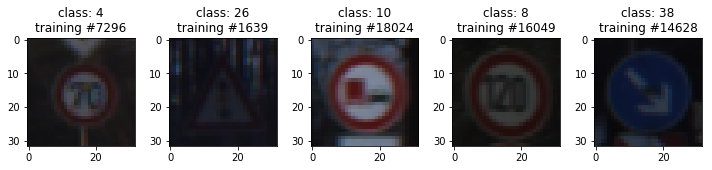

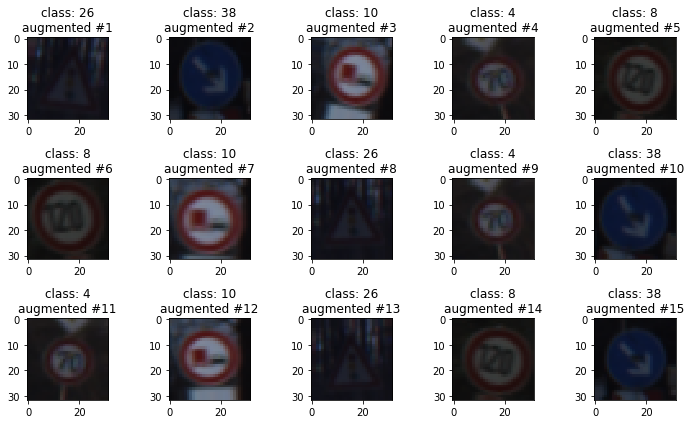

In [10]:
num_samples = 5
num_transforms = 3
random.seed(RANDOM_SEED)
random_image_idcs = random.sample(range(0, n_train - 1), num_samples)
print(random_image_idcs)

X_samples, y_samples = np.array([X_train[i] for i in random_image_idcs]), np.array([y_train[i] for i in random_image_idcs])

X_aug, y_aug = augment_images(X_samples, y_samples, num_transforms)
print(f'Augmented data shape:\nX shape: {X_aug.shape}\ny shape: {y_aug.shape}')

# plot original images
fig = plot_images_as_grid(X_samples, 
                          labels=[f'class: {c}\ntraining #{random_image_idcs[i]}' for i, c in enumerate(y_samples)])

# plot augmented images
fig = plot_images_as_grid(X_aug, 
                          labels=[f'class: {c}\naugmented #{i+1}' for i, c in enumerate(y_aug)])

### Create augmented training set

In [11]:
num_transforms = 5

# Load augmented data from pickle file if it has already been created to save time.
# Otherwise, create augmented data from training set.
augmented_training_file = os.path.join(data_dir, 'augmented_train.p')
if os.path.isfile(augmented_training_file):
    print(f'Found augmented training data in "{augmented_training_file}" - loading...\n')
    
    with open(augmented_training_file, mode='rb') as f:
        augmented_train = pickle.load(f)
    
    X_augmented_train, y_augmented_train = np.array(augmented_train['features']), np.array(augmented_train['labels'])
else:
    print('No augmented data for training set found.\nCreating augmented data (this can take a while)...\n')
    
    X_augmented_train, y_augmented_train = augment_images(X_train, y_train, num_transforms=num_transforms)
    # Include original training data
    X_augmented_train = np.concatenate([X_train, X_augmented_train])
    y_augmented_train = np.concatenate([y_train, y_augmented_train])
    
    print(f'Saving augmented dataset to "{augmented_training_file}"...')
    with open(augmented_training_file, mode='wb') as f:
        pickle.dump({
            'features': X_augmented_train,
            'labels': y_augmented_train
        }, f, pickle.HIGHEST_PROTOCOL)

n_augmented_train = y_augmented_train.shape[0]
print(f'Original training size: {n_train}\nAugmented training size: {n_augmented_train}\n')

Found augmented training data in "..\data\augmented_train.p" - loading...

Original training size: 34799
Augmented training size: 208794



### Model Architecture

First, I created some helper functions which are used to create the layers of my model and add summaries to every layer for TensorBoard:

In [12]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

# Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
mu = 0
sigma = 0.1

def add_layer_summary(W, b, activations):
    tf.summary.histogram('weights', W)
    tf.summary.histogram('biases', b)
    tf.summary.histogram('activations', activations)
    
def get_init_weights(scope, shape, method=WeightsInitialization.normal):
    with tf.variable_scope(scope):
        if method is WeightsInitialization.xavier:
            return tf.get_variable('W', shape=shape, initializer=tf.contrib.layers.xavier_initializer())
        return tf.get_variable('W', shape=shape, initializer=tf.truncated_normal_initializer(mean=mu, stddev=sigma))
    
def conv_layer(X, size_in, size_out, name='conv', padding='VALID',
               filter_size=5, stride=[1, 1, 1, 1], 
               pooling_size=[1, 2, 2, 1], pooling_stride=[1, 2, 2, 1], 
               init_method=WeightsInitialization.normal):
    with tf.name_scope(name):
        W = get_init_weights(name, shape=[filter_size, filter_size, size_in, size_out], method=init_method)
        b = tf.Variable(tf.zeros(size_out), name='b')
        conv = tf.nn.conv2d(X, W, strides=stride, padding=padding) + b
        act = tf.nn.relu(conv)
        add_layer_summary(W, b, act)
        return tf.nn.max_pool(act, ksize=pooling_size, strides=pooling_stride, padding=padding)

def fc_layer(X, size_in, size_out, name='fc', init_method=WeightsInitialization.normal):
    with tf.name_scope(name):
        W = get_init_weights(name, shape=[size_in, size_out], method=init_method)
        b = tf.Variable(tf.zeros(size_out), name='b')
        fc = tf.matmul(X, W) + b
        act = tf.nn.relu(fc)
        add_layer_summary(W, b, act)
        return act

def output_layer(X, size_in, size_out, name='output', init_method=WeightsInitialization.normal):
    with tf.name_scope(name):
        W = get_init_weights(name, shape=[size_in, size_out], method=init_method)
        b = tf.Variable(tf.zeros(size_out), name='b')
        out = tf.matmul(X, W) + b
        tf.summary.histogram('weights', W)
        tf.summary.histogram('biases', b)
        return out

Then, I created a LeNet-architecture by building each of the layers using the helper functions:

In [13]:
def LeNet_model(input, dropout_keep_prob, n_channels=3, init_method=WeightsInitialization.normal):
    # Layer 1: Convolutional. Input = 32x32xC. Output = 28x28x6.
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = conv_layer(input, size_in=n_channels, size_out=6, name='conv1', init_method=init_method)

    # Layer 2: Convolutional. Output = 10x10x16.
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = conv_layer(conv1, size_in=6, size_out=16, name='conv2', init_method=init_method)

    # Flatten. Input = 5x5x16. Output = 400.
    fc0 = flatten(conv2)

    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1 = fc_layer(fc0, size_in=400, size_out=120, name='fc1', init_method=init_method)
    fc1_out = tf.nn.dropout(fc1, dropout_keep_prob, name='fc1_dropout')

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2 = fc_layer(fc1_out, size_in=120, size_out=84, name='fc2', init_method=init_method)
    fc2_out = tf.nn.dropout(fc2, dropout_keep_prob, name='fc2_dropout')

    # Layer 5: Fully Connected. Input = 84. Output = n_classes.
    logits = output_layer(fc2_out, size_in=84, size_out=n_classes, name='output', init_method=init_method)
    return logits

This model is then used inside a class that takes care of feeding data to the model to train, validate and test the neural net. The class provides support for different values for the hyperparameters to tune them to our data:

In [14]:
LOG_DIR = 'logs/'
MODEL_DIR = 'models/'
L2_BETA = 0.01

class TrafficSignNetwork:
    def __init__(self, model_name, batch_size=128, learning_rate=1e-2, color_space=ColorSpace.RGB, init_method=WeightsInitialization.normal):
        self.model_name = model_name
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        
        tf.reset_default_graph()
        tf.set_random_seed(RANDOM_SEED)
        
        n_channels = 1 if color_space is ColorSpace.grayscale else 3
        
        self.x = tf.placeholder(tf.float32, [None, 32, 32, n_channels], name='features')
        self.y = tf.placeholder(tf.int32, [None], name='labels')
        one_hot_y = tf.one_hot(self.y, n_classes)
        
        self.keep_prob = tf.placeholder(tf.float32)

        image_summary = tf.summary.image('input', self.x, 3)
        self.logits = LeNet_model(self.x, self.keep_prob, n_channels=n_channels, init_method=init_method)

        cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=one_hot_y, logits=self.logits)
        ordinary_loss = tf.reduce_mean(cross_entropy)
        self.loss = ordinary_loss + tf.reduce_sum(tf.losses.get_regularization_losses())

        optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
        self.loss_minimize = optimizer.minimize(self.loss)

        correct_prediction = tf.equal(tf.argmax(self.logits, 1), tf.argmax(one_hot_y, 1))
        self.accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

        self.model_summary = tf.summary.merge_all()

        with tf.name_scope('performance'):
            self.loss_ph = tf.placeholder(tf.float32, shape=None, name='loss_summary')
            loss_summary = tf.summary.scalar('loss', self.loss_ph)

            self.accuracy_ph = tf.placeholder(tf.float32, shape=None, name='accuracy_summary')
            accuracy_summary = tf.summary.scalar('accuracy', self.accuracy_ph)

        self.performance_summaries = tf.summary.merge([loss_summary, accuracy_summary])
        
        self.saver = tf.train.Saver()
    
    def train_and_validate(self, X_train, y_train, X_valid, y_valid, epochs=10):
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            
            log_base_dir = f'{LOG_DIR}/{self.model_name}'
            train_writer = tf.summary.FileWriter(f'{log_base_dir}/train', sess.graph)
            valid_writer = tf.summary.FileWriter(f'{log_base_dir}/valid', sess.graph)

            print(f'Training model "{self.model_name}"...')

            for epoch in range(epochs):
                avg_train_acc, train_summ = self.train_epoch(sess, X_train, y_train)
                for s in train_summ:
                    if s is not None:
                        train_writer.add_summary(s, epoch)
                
                avg_valid_acc, valid_summ = self.validate_epoch(sess, X_valid, y_valid)
                valid_writer.add_summary(valid_summ, epoch)
                
                print(f'EPOCH {epoch}: avg training accuracy: {avg_train_acc:.3f} - avg validation accuracy: {avg_valid_acc:.3f}')

            print()
            self.saver.save(sess, os.path.join(MODEL_DIR, f'{self.model_name}.ckpt'))
            print('Model saved...')
    
    def train_epoch(self, session, X_train, y_train):
        train_loss = []
        train_acc = []
        train_batch_weights = []
        model_summ = None
        
        X_train, y_train = shuffle(X_train, y_train, random_state=RANDOM_SEED)
        
        num_examples = len(X_train)
        total_batches = num_examples // self.batch_size
        for offset in range(0, num_examples, self.batch_size):
            end = offset + self.batch_size
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]

            # get distributions and input from just the first batch of the epoch
            if offset == 0:
                l, acc, model_summ, _ = session.run([
                    self.loss, 
                    self.accuracy, 
                    self.model_summary, 
                    self.loss_minimize
                ], feed_dict={self.x: batch_x, self.y: batch_y, self.keep_prob: 0.5})
            else:
                l, acc, _ = session.run([
                    self.loss, 
                    self.accuracy, 
                    self.loss_minimize
                ], feed_dict={self.x: batch_x, self.y: batch_y, self.keep_prob: 0.5})

            train_loss.append(l)
            train_acc.append(acc)
            train_batch_weights.append(len(batch_x))

        avg_train_loss = np.average(train_loss, weights=train_batch_weights)
        avg_train_acc = np.average(train_acc, weights=train_batch_weights)
        
        performance_summary = session.run(self.performance_summaries, 
                                          feed_dict={self.loss_ph: avg_train_loss, self.accuracy_ph: avg_train_acc})
        return avg_train_acc, [performance_summary, model_summ]
    
    def validate_epoch(self, session, X_valid, y_valid):
        valid_loss = []
        valid_acc = []
        valid_batch_weights = []
        
        valid_len = len(X_valid)
        for offset in range(0, valid_len, self.batch_size):
            end = offset + self.batch_size
            batch_x, batch_y = X_valid[offset:end], y_valid[offset:end]

            l, acc = session.run([
                self.loss, 
                self.accuracy
            ], feed_dict={self.x: batch_x, self.y: batch_y, self.keep_prob: 1.0})

            valid_loss.append(l)
            valid_acc.append(acc)
            valid_batch_weights.append(len(batch_x))

        avg_valid_loss = np.average(valid_loss, weights=valid_batch_weights)
        avg_valid_acc = np.average(valid_acc, weights=valid_batch_weights)
        
        performance_summary = session.run(self.performance_summaries, 
                                          feed_dict={self.loss_ph: avg_valid_loss, self.accuracy_ph: avg_valid_acc})
        return avg_valid_acc, performance_summary
    
    def test(self, X_test, y_test):
        with tf.Session() as sess:
            self.saver.restore(sess, tf.train.latest_checkpoint(os.path.join(MODEL_DIR)))
            
            total_acc = 0
            num_samples = len(X_test)
            for offset in range(0, num_samples, self.batch_size):
                end = offset + self.batch_size
                batch_x, batch_y = X_test[offset:end], y_test[offset:end]

                acc = sess.run(self.accuracy, feed_dict={self.x: batch_x, self.y: batch_y, self.keep_prob: 1.0})

                total_acc += (acc * len(batch_x))
            
            test_acc = total_acc/num_samples
            print("Test Accuracy = {:.3f}".format(test_acc))

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

Calculate and report the accuracy on the training and validation set.
Once a final model architecture is selected, the accuracy on the test set should be calculated and reported as well.

In [15]:
import time

# Evaluating different hyperparameters and network structures:
for learning_rate in [1e-3]:
    for color_space in [ColorSpace.grayscale, ColorSpace.RGB]:
        for weights_init in [WeightsInitialization.normal, WeightsInitialization.xavier]:
            X_train_pre, y_train_pre = preprocess_data(X_augmented_train, y_augmented_train, color_space=color_space)
            X_valid_pre, y_valid_pre = preprocess_data(X_valid, y_valid, color_space=color_space)

            model_name = f'LeNet_{color_space.name}_R-{learning_rate}_{weights_init.name}_{int(time.time())}'

            net = TrafficSignNetwork(model_name, batch_size=32, learning_rate=learning_rate, color_space=color_space, init_method=weights_init)
            net.train_and_validate(X_train_pre, y_train_pre, X_valid_pre, y_valid_pre, epochs=10)

Training model "LeNet_grayscale_R-0.001_normal_1539007551"...
EPOCH 0: avg training accuracy: 0.504 - avg validation accuracy: 0.852
EPOCH 1: avg training accuracy: 0.749 - avg validation accuracy: 0.911
EPOCH 2: avg training accuracy: 0.819 - avg validation accuracy: 0.937
EPOCH 3: avg training accuracy: 0.851 - avg validation accuracy: 0.950
EPOCH 4: avg training accuracy: 0.869 - avg validation accuracy: 0.959
EPOCH 5: avg training accuracy: 0.881 - avg validation accuracy: 0.964
EPOCH 6: avg training accuracy: 0.891 - avg validation accuracy: 0.962
EPOCH 7: avg training accuracy: 0.897 - avg validation accuracy: 0.964
EPOCH 8: avg training accuracy: 0.903 - avg validation accuracy: 0.971
EPOCH 9: avg training accuracy: 0.907 - avg validation accuracy: 0.971

Model saved...
Training model "LeNet_grayscale_R-0.001_xavier_1539007841"...
EPOCH 0: avg training accuracy: 0.493 - avg validation accuracy: 0.847
EPOCH 1: avg training accuracy: 0.742 - avg validation accuracy: 0.904
EPOCH 2:

A bit surprising for me, grayscale images with a learning rate of 1e-3 and normal initialization show better accuracy than RGB images with xavier initialization. Training for more epochs leads to overfitting, so I just tested the model with training stopped at 9 epochs:

In [24]:
import time

learning_rate = 1e-3
color_space = ColorSpace.grayscale
weights_init = WeightsInitialization.normal

X_train_pre, y_train_pre = preprocess_data(X_augmented_train, y_augmented_train, color_space=color_space)
X_valid_pre, y_valid_pre = preprocess_data(X_valid, y_valid, color_space=color_space)

model_name = f'LeNet_{color_space.name}_R-{learning_rate}_{weights_init.name}_{int(time.time())}'

net = TrafficSignNetwork(model_name, batch_size=32, learning_rate=learning_rate, color_space=color_space, init_method=weights_init)
net.train_and_validate(X_train_pre, y_train_pre, X_valid_pre, y_valid_pre, epochs=9)

Training model "LeNet_grayscale_R-0.001_normal_1539014937"...
EPOCH 0: avg training accuracy: 0.501 - avg validation accuracy: 0.837
EPOCH 1: avg training accuracy: 0.751 - avg validation accuracy: 0.918
EPOCH 2: avg training accuracy: 0.822 - avg validation accuracy: 0.937
EPOCH 3: avg training accuracy: 0.855 - avg validation accuracy: 0.956
EPOCH 4: avg training accuracy: 0.875 - avg validation accuracy: 0.955
EPOCH 5: avg training accuracy: 0.888 - avg validation accuracy: 0.967
EPOCH 6: avg training accuracy: 0.897 - avg validation accuracy: 0.963
EPOCH 7: avg training accuracy: 0.905 - avg validation accuracy: 0.963
EPOCH 8: avg training accuracy: 0.910 - avg validation accuracy: 0.966

Model saved...


In [25]:
X_test_pre, y_test_pre = preprocess_data(X_test, y_test, color_space=color_space)
net.test(X_test_pre, y_test_pre)

INFO:tensorflow:Restoring parameters from models/LeNet_grayscale_R-0.001_normal_1539014937.ckpt
Test Accuracy = 0.947


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [26]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Predict the Sign Type for Each Image

In [27]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [28]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [29]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [30]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")